C:\Users\aitor\AppData\Local\Temp\ipykernel_2488\3991441772.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])


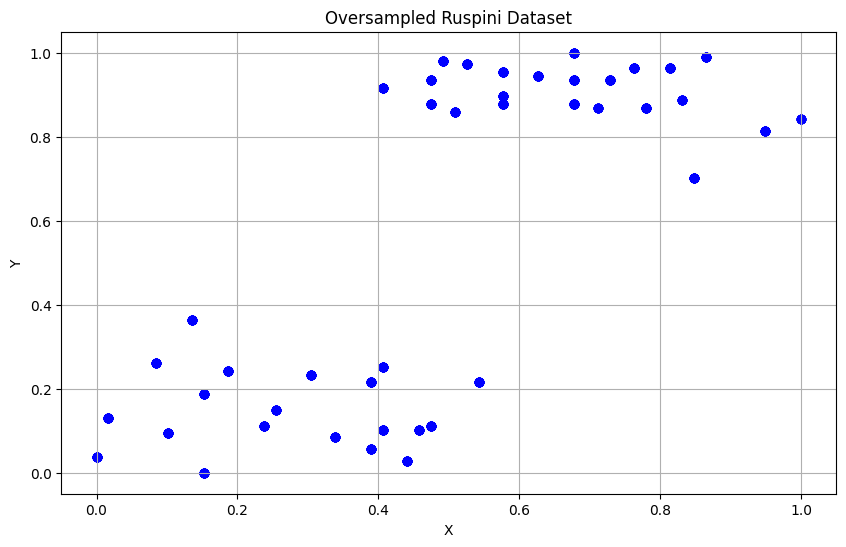

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the data
file_path = 'ruspini/data_ruspini_1.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
# Apply min-max normalization
data['x'] = (data['x'] - data['x'].min()) / (data['x'].max() - data['x'].min())
data['y'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())
# Oversample the data
data_oversampled = resample(data, replace=True,n_samples=666, random_state=42)

# Plot the oversampled data
plt.figure(figsize=(10, 6))
plt.scatter(data_oversampled['x'], data_oversampled['y'], c='blue', marker='o')
plt.title('Oversampled Ruspini Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [11]:

import tensorflow as tf
def mse_closest_torch(a, b):
    """
    Calculate the mean squared error (MSE) between each point in 'a' and the closest centroid in 'b'.

    Parameters:
    a (tf.Tensor): A tensor of shape (n_samples, n_points*2), e.g., (160, 2000), containing the points for each sample.
    b (tf.Tensor): A tensor of shape (n_samples, n_centroids*2), e.g., (160, 4), containing the centroids for each sample.

    Returns:
    float: The average of the minimum squared distances between each point and the closest centroid.
    """
    # Slicing from the fourth position (index 3) onwards along the second dimension
    aa = a[:, 4:]
    #print(a.shape)

    n_samples = aa.shape[0]         # nsamples in this case is the batch size
    n_points = aa.shape[1] // 2     # 2004 coordinates, 1002 points (x, y), [trainoutputs,traininputs]
    n_centroids = b.shape[1] // 2  # 4 coordinates, 2 centroids (x, y)
    #print(n_samples)
    # print(a[0][:4])
    # print(a[0][4:])
    # a = a[4:]



    # Initialize a tensor to hold the minimum distances
    min_distances = tf.zeros((n_samples, n_points), dtype=aa.dtype)
    # Reshape a to shape (n_samples, n_points, 2) and b to shape (n_samples, n_centroids, 2)
    a_reshaped = tf.reshape(aa, (n_samples, n_points, 2))
    b_reshaped = tf.reshape(b, (n_samples, n_centroids, 2))

    for i in range(n_samples):
        points = a_reshaped[i]
        centroids = b_reshaped[i]


        # Calculate the squared distances from each point to each centroid
        squared_distances = tf.reduce_sum((tf.expand_dims(points, 1) - tf.expand_dims(centroids, 0)) ** 2, axis=2)

        # Find the minimum squared distance for each point
        min_squared_distances = tf.reduce_min(squared_distances, axis=1)
        #print(min_squared_distances)
        # Store the minimum distances
        min_distances = tf.tensor_scatter_nd_update(min_distances, [[i]], [min_squared_distances])
    # Calculate the average of the minimum squared distances for all points in all samples
    mse_val = tf.reduce_mean(min_distances)
    #print(mse_val.numpy())

    return mse_val

def custom_loss(y_true,y_pred):
    return mse_closest_torch(y_true,y_pred)


In [12]:
model_evolved = tf.keras.models.load_model('../models/k_model_new_111_0_0_0_2_4_2_8_8_Circles_original_3',custom_objects={'custom_loss':custom_loss})
#models/k_model_new_121_0_0_0_2_50_20_8_8_Concentric
#models/k_model_new_111_0_0_0_2_4_2_8_8_Circles_original_2

1/1 [==============================] - 0s 45ms/step


C:\Users\aitor\AppData\Local\Temp\ipykernel_2488\4009419601.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])


[[0.22582717 0.23823097 0.65919    0.7845473  0.69605696 0.42171133]]


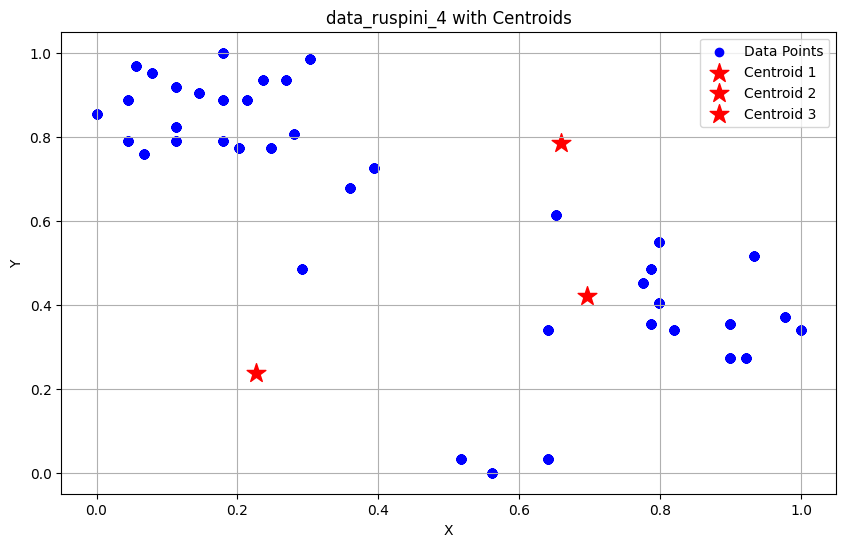

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import os

# Load the data
file_path = 'ruspini/data_ruspini_4.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
data['x'] = (data['x'] - data['x'].min()) / (data['x'].max() - data['x'].min())
data['y'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())

# Extract the file name without extension
file_name = os.path.splitext(os.path.basename(file_path))[0]

# Oversample the data
data_oversampled = resample(data, replace=True, n_samples=1500, random_state=42)

sorted_by_x = data_oversampled.sort_values(by='x')
sorted_by_y = data_oversampled.sort_values(by='y')

flattened_vector = sorted_by_x.to_numpy().flatten().reshape(1, -1)
predictions_centroids = model_evolved.predict(flattened_vector)

# Plot the oversampled data
plt.figure(figsize=(10, 6))
plt.scatter(data_oversampled['x'], data_oversampled['y'], c='blue', marker='o', label='Data Points')

# Plot centroids
for i, (x, y) in enumerate(zip(predictions_centroids[0][::2], predictions_centroids[0][1::2])):
    plt.scatter(x, y, c='red', marker='*', s=200, label=f'Centroid {i+1}')
print(predictions_centroids)
plt.title(f'{file_name} with Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
# Save the plot as PNG file
#plt.savefig(f'{file_name}_centroid_predictions.png')
plt.show()


